<a href="https://colab.research.google.com/github/Ke-erah/Cousera_Capstone/blob/master/Cleaning_Actors_Names.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import re

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
uploaded = files.upload()

Saving datasets_10616_14857_imdb_1000.csv to datasets_10616_14857_imdb_1000 (2).csv


In [4]:
import io
imdb = pd.read_csv(io.BytesIO(uploaded['datasets_10616_14857_imdb_1000.csv']))
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [5]:
# unique star ratings
star_ratings = imdb['star_rating'].value_counts()
star_ratings

7.6    124
7.8    116
7.7    113
7.5    108
8.1    103
8.0     97
7.9     75
8.2     51
7.4     49
8.3     43
8.4     37
8.5     23
8.6     15
8.7     10
8.9      6
8.8      5
9.3      1
9.2      1
9.1      1
9.0      1
Name: star_rating, dtype: int64

In [6]:
#unique content ratings
content_ratings = imdb['content_rating'].value_counts()
content_ratings

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

In [7]:
#genres
genres = imdb['genre'].value_counts()
genres

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [8]:
#visualizing actors column
actors = imdb['actors_list']
actors.head()

0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....
Name: actors_list, dtype: object

In [9]:
#stripping square brackets
actors = actors.str.replace('[', '')
actors = actors.str.replace(']','')
actors.head()

0     u'Tim Robbins', u'Morgan Freeman', u'Bob Gunton'
1        u'Marlon Brando', u'Al Pacino', u'James Caan'
2    u'Al Pacino', u'Robert De Niro', u'Robert Duvall'
3    u'Christian Bale', u'Heath Ledger', u'Aaron Ec...
4    u'John Travolta', u'Uma Thurman', u'Samuel L. ...
Name: actors_list, dtype: object

In [10]:
#splitting each row into individual names/columns
columns=['actor_1', 'actor_2', 'actor_3']
indv_actors = actors.str.split(pat=',', n=-1, expand=True)
indv_actors.columns = columns
indv_actors.head()

,actor_1,actor_2,actor_3
0,u'Tim Robbins',u'Morgan Freeman',u'Bob Gunton'
1,u'Marlon Brando',u'Al Pacino',u'James Caan'
2,u'Al Pacino',u'Robert De Niro',u'Robert Duvall'
3,u'Christian Bale',u'Heath Ledger',u'Aaron Eckhart'
4,u'John Travolta',u'Uma Thurman',u'Samuel L. Jackson'


In [11]:
#strip leading and trailing whitespaces
indv_actors['actor_1'] = indv_actors['actor_1'].str.strip()
indv_actors['actor_2'] = indv_actors['actor_2'].str.strip()
indv_actors['actor_3'] = indv_actors['actor_3'].str.strip()
indv_actors.head()


,actor_1,actor_2,actor_3
0,u'Tim Robbins',u'Morgan Freeman',u'Bob Gunton'
1,u'Marlon Brando',u'Al Pacino',u'James Caan'
2,u'Al Pacino',u'Robert De Niro',u'Robert Duvall'
3,u'Christian Bale',u'Heath Ledger',u'Aaron Eckhart'
4,u'John Travolta',u'Uma Thurman',u'Samuel L. Jackson'


In [12]:
#strip leading letter 'u'
indv_actors['actor_1'] = indv_actors['actor_1'].str.lstrip(to_strip='u')
indv_actors['actor_2'] = indv_actors['actor_2'].str.lstrip(to_strip='u')
indv_actors['actor_3'] = indv_actors['actor_3'].str.lstrip(to_strip='u')
indv_actors.head()

,actor_1,actor_2,actor_3
0,'Tim Robbins','Morgan Freeman','Bob Gunton'
1,'Marlon Brando','Al Pacino','James Caan'
2,'Al Pacino','Robert De Niro','Robert Duvall'
3,'Christian Bale','Heath Ledger','Aaron Eckhart'
4,'John Travolta','Uma Thurman','Samuel L. Jackson'


In [13]:
#strip ''
indv_actors['actor_1'] = indv_actors['actor_1'].str.lstrip(to_strip='\'')
indv_actors['actor_2'] = indv_actors['actor_2'].str.lstrip(to_strip='\'')
indv_actors['actor_3'] = indv_actors['actor_3'].str.lstrip(to_strip='\'')
indv_actors['actor_1'] = indv_actors['actor_1'].str.rstrip(to_strip='\'')
indv_actors['actor_2'] = indv_actors['actor_2'].str.rstrip(to_strip='\'')
indv_actors['actor_3'] = indv_actors['actor_3'].str.rstrip(to_strip='\'')
indv_actors.head()

,actor_1,actor_2,actor_3
0,Tim Robbins,Morgan Freeman,Bob Gunton
1,Marlon Brando,Al Pacino,James Caan
2,Al Pacino,Robert De Niro,Robert Duvall
3,Christian Bale,Heath Ledger,Aaron Eckhart
4,John Travolta,Uma Thurman,Samuel L. Jackson


In [14]:
#assign actors names back to the main dataframe
imdb[columns] = indv_actors
imdb.head()

,star_rating,title,content_rating,genre,duration,actors_list,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",John Travolta,Uma Thurman,Samuel L. Jackson


In [16]:
#drop 'actors_list'
imdb.drop(labels='actors_list', inplace=True, axis = 1)
imdb.head()

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
0,9.3,The Shawshank Redemption,R,Crime,142,Tim Robbins,Morgan Freeman,Bob Gunton
1,9.2,The Godfather,R,Crime,175,Marlon Brando,Al Pacino,James Caan
2,9.1,The Godfather: Part II,R,Crime,200,Al Pacino,Robert De Niro,Robert Duvall
3,9.0,The Dark Knight,PG-13,Action,152,Christian Bale,Heath Ledger,Aaron Eckhart
4,8.9,Pulp Fiction,R,Crime,154,John Travolta,Uma Thurman,Samuel L. Jackson


In [22]:
genres_pct = (genres/sum(genres))*100
genres_pct

Drama        28.396323
Comedy       15.934627
Action       13.891726
Crime        12.665986
Biography     7.865169
Adventure     7.660878
Animation     6.332993
Horror        2.962206
Mystery       1.634321
Western       0.919305
Sci-Fi        0.510725
Thriller      0.510725
Film-Noir     0.306435
Family        0.204290
History       0.102145
Fantasy       0.102145
Name: genre, dtype: float64

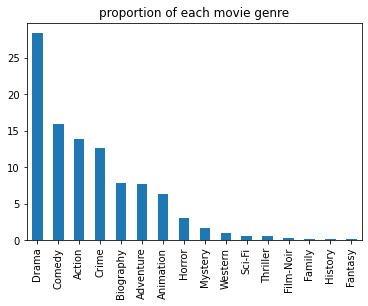

In [25]:
#visualizing genre proportions
genres_pct.plot(kind='bar', title = 'proportion of each movie genre')

In [30]:
imdb.describe(include='all')

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
count,979.000000,979,976,979,979.000000,979,979,979
unique,NaN,975,12,16,NaN,581,768,846
top,NaN,Dracula,R,Drama,NaN,Robert De Niro,Emma Watson,Rupert Grint
freq,NaN,2,460,278,NaN,13,7,6
mean,7.889785,NaN,NaN,NaN,120.979571,NaN,NaN,NaN
std,0.336069,NaN,NaN,NaN,26.218010,NaN,NaN,NaN
min,7.400000,NaN,NaN,NaN,64.000000,NaN,NaN,NaN
25%,7.600000,NaN,NaN,NaN,102.000000,NaN,NaN,NaN
50%,7.800000,NaN,NaN,NaN,117.000000,NaN,NaN,NaN
75%,8.100000,NaN,NaN,NaN,134.000000,NaN,NaN,NaN


In [31]:
# group genre by star ratings to represent average raing per genre
genre_rating_pv = imdb.pivot_table(values= 'star_rating', index = 'genre')
genre_rating_pv

,star_rating
genre,
Action,7.884559
Adventure,7.933333
Animation,7.914516
Biography,7.862338
Comedy,7.822436
Crime,7.916935
Drama,7.902518
Family,7.850000
Fantasy,7.700000


No significant variation in ratings is seen.

In [35]:
top_actors1=imdb['actor_1'].value_counts().head(5)
top_actors1

Robert De Niro    13
Tom Hanks         12
Clint Eastwood    11
Al Pacino         10
Johnny Depp       10
Name: actor_1, dtype: int64

In [36]:
top_actors2=imdb['actor_2'].value_counts().head(5)
top_actors2

Emma Watson      7
Kate Winslet     6
Matt Damon       6
Geoffrey Rush    5
Michael Caine    4
Name: actor_2, dtype: int64

In [37]:
top_actors3=imdb['actor_3'].value_counts().head(5)
top_actors3

Rupert Grint          6
Scarlett Johansson    5
Ed Harris             4
Carrie Fisher         4
Jennifer Connelly     4
Name: actor_3, dtype: int64

In [39]:
imdb[imdb['actor_1']=='Tom Hanks'] 

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
13,8.8,Forrest Gump,PG-13,Drama,142,Tom Hanks,Robin Wright,Gary Sinise
36,8.6,Saving Private Ryan,R,Action,169,Tom Hanks,Matt Damon,Tom Sizemore
40,8.5,The Green Mile,R,Crime,189,Tom Hanks,Michael Clarke Duncan,David Morse
81,8.4,Toy Story 3,G,Animation,103,Tom Hanks,Tim Allen,Joan Cusack
117,8.3,Toy Story,G,Animation,81,Tom Hanks,Tim Allen,Don Rickles
414,7.9,Toy Story 2,G,Animation,92,Tom Hanks,Tim Allen,Joan Cusack
447,7.9,Captain Phillips,PG-13,Biography,134,Tom Hanks,Barkhad Abdi,Barkhad Abdirahman
587,7.7,Road to Perdition,R,Crime,117,Tom Hanks,Tyler Hoechlin,Rob Maxey
629,7.7,Cast Away,PG-13,Adventure,143,Tom Hanks,Helen Hunt,Paul Sanchez
644,7.7,Philadelphia,PG-13,Drama,125,Tom Hanks,Denzel Washington,Roberta Maxwell


In [40]:
imdb[imdb['actor_1']=='Clint Eastwood']

,star_rating,title,content_rating,genre,duration,actor_1,actor_2,actor_3
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,Clint Eastwood,Eli Wallach,Lee Van Cleef
107,8.3,For a Few Dollars More,APPROVED,Western,132,Clint Eastwood,Lee Van Cleef,Gian Maria Volont\xe9
119,8.3,Unforgiven,R,Western,131,Clint Eastwood,Gene Hackman,Morgan Freeman
162,8.2,Gran Torino,R,Drama,116,Clint Eastwood,Bee Vang,Christopher Carley
276,8.1,A Fistful of Dollars,R,Action,99,Clint Eastwood,Gian Maria Volont\xe9,Marianne Koch
421,7.9,The Outlaw Josey Wales,PG,Western,135,Clint Eastwood,Sondra Locke,Chief Dan George
515,7.8,Dirty Harry,R,Action,102,Clint Eastwood,Andrew Robinson,Harry Guardino
691,7.7,Kelly's Heroes,GP,Action,144,Clint Eastwood,Telly Savalas,Don Rickles
704,7.6,High Plains Drifter,R,Western,105,Clint Eastwood,Verna Bloom,Marianna Hill
753,7.6,Escape from Alcatraz,PG,Action,112,Clint Eastwood,Patrick McGoohan,Roberts Blossom


No significant change in star rating observed in movies with top actors